In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from catboost import CatBoostClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train_fe_5.csv')
test = pd.read_csv('test_fe_5.csv')
labels = pd.read_csv('train_labels.csv')

df = pd.concat([train, test], axis=0)



In [5]:
train.shape, test.shape

((260601, 48), (86868, 48))

In [6]:
df.head()

,age,area_percentage,count_families,count_floors_pre_eq,geo_level_1_id,geo_level_2_id,geo_level_3_id,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_gov_office,has_secondary_use_health_post,has_secondary_use_hotel,has_secondary_use_industry,has_secondary_use_institution,has_secondary_use_other,has_secondary_use_rental,has_secondary_use_school,has_secondary_use_use_police,has_superstructure_adobe_mud,has_superstructure_bamboo,has_superstructure_cement_mortar_brick,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_mud_mortar_stone,has_superstructure_other,has_superstructure_rc_engineered,has_superstructure_rc_non_engineered,has_superstructure_stone_flag,has_superstructure_timber,height_percentage,land_surface_condition_risk,foundation_type_risk,roof_type_risk,ground_floor_type_risk,other_floor_type_risk,position_risk,plan_configuration_risk,legal_ownership_status_risk,risk_factor,area_per_family,height_per_floor,families_per_floor,has_superstructure,has_cement,has_mortar,geo_1_risk,geo_2_risk,geo_3_risk
0,30,6,1,2,6,487,12198,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,5,2.234,2.33,2.27,2.31,2.3157,2.309,2.24365,2.244,2.275055,0.166667,2.5,0.500000,1,0,1,2.161724,2.123656,2.483871
1,10,8,1,2,8,900,2812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,2.290,2.33,2.27,2.25,2.3157,2.229,2.24365,2.244,2.295472,0.125000,3.5,0.500000,1,0,1,2.485273,2.108696,2.483871
2,10,5,1,2,21,363,8973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,2.234,2.33,2.27,2.31,2.2970,2.309,2.24365,2.244,2.317920,0.200000,2.5,0.500000,1,0,1,2.563369,2.914286,1.781818
3,10,6,1,2,22,418,10694,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,5,2.234,2.33,2.27,2.31,2.2970,2.229,2.24365,2.244,2.239072,0.166667,2.5,0.500000,1,0,1,2.000960,2.471186,2.000000
4,30,8,1,3,11,131,1488,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9,2.234,2.33,2.27,2.31,2.2970,2.229,2.24365,2.244,2.255758,0.125000,3.0,0.333333,1,0,0,2.337713,2.074074,2.243902


In [7]:
obj_train = pd.read_csv('train_values.csv')
obj_test = pd.read_csv('test_values.csv')

obj_df = pd.concat([obj_train, obj_test], axis=0)

In [8]:
obj_df.shape, df.shape

((347469, 39), (347469, 48))

In [10]:
obj_cols = []
for item in obj_df.columns:
    if item not in df.columns:
        obj_cols.append(item)

In [11]:
data = pd.concat([df, obj_df[obj_cols]], axis=1)

In [12]:
data.shape

(347469, 57)

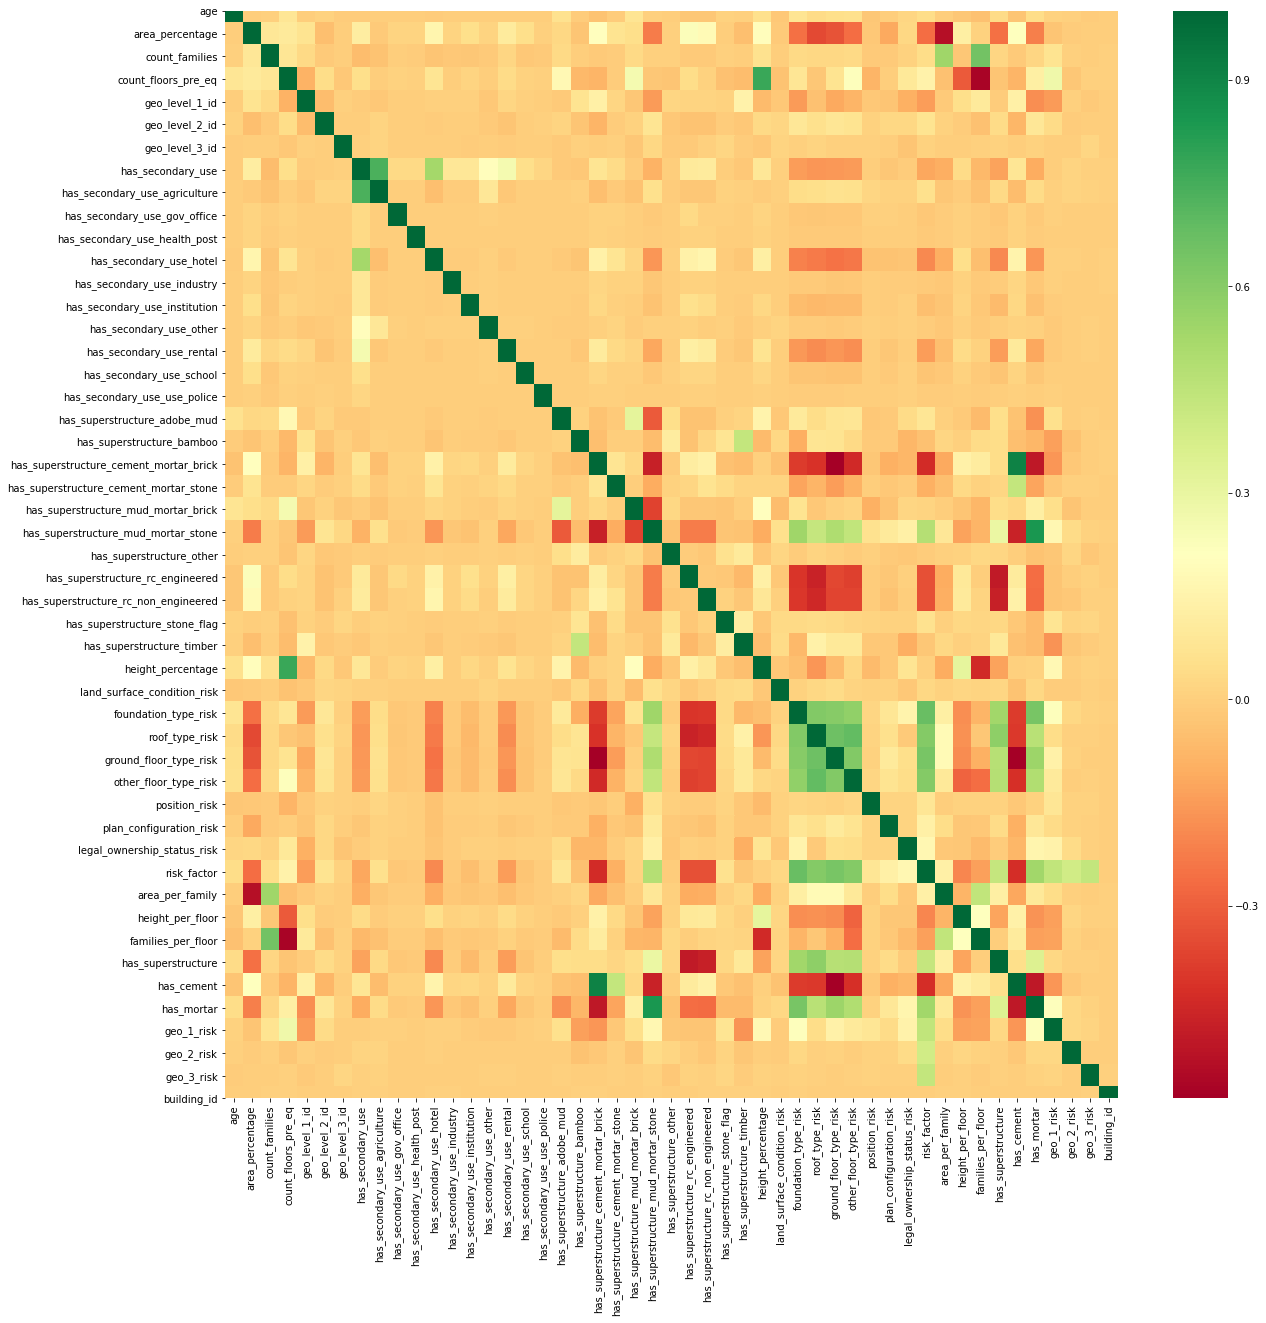

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap='RdYlGn')

In [16]:
sec_uses = []
for item in data.columns:
    if item[:18] == "has_secondary_use_":
        sec_uses.append(item)

In [17]:
sec_uses

['has_secondary_use_agriculture',
 'has_secondary_use_gov_office',
 'has_secondary_use_health_post',
 'has_secondary_use_hotel',
 'has_secondary_use_industry',
 'has_secondary_use_institution',
 'has_secondary_use_other',
 'has_secondary_use_rental',
 'has_secondary_use_school',
 'has_secondary_use_use_police']

In [20]:
superstructures = []
for item in data.columns:
    if item[:19]=="has_superstructure_":
        superstructures.append(item)

In [26]:
superstructures

['has_superstructure_adobe_mud',
 'has_superstructure_bamboo',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_other',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_stone_flag',
 'has_superstructure_timber']

In [24]:
superstructures.remove('has_superstructure_rc_engineered')

In [27]:
superstructures.remove('has_superstructure_rc_non_engineered')

In [33]:
def secondary_use(x):
    if x['has_secondary_use'] == 1:
        for i in sec_uses:
            if x[i] == 1:
                return i
    return "None"

def has_superstructure(x):
    for i in superstructures:
        if x[i] == 1:
            return i
    return "None"

In [38]:
data['superstructure_type'] = ''
data['secondary_use_type'] = ''

In [66]:
data.loc[2, 'has_superstructure_adobe_mud'].sum()

0

In [ ]:
for i in range(0, data.shape[0]):
    flag=0
    for col in data.columns:
        if ((col in sec_uses) & (data.loc[i, col].sum() == 1)):
            data.loc[i, "secondary_use_type"] = col[18:]
            flag=1
        if flag==0:
            data.loc[i, "secondary_use_type"] = "None"

In [32]:
data.head()

,age,area_percentage,count_families,count_floors_pre_eq,geo_level_1_id,geo_level_2_id,geo_level_3_id,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_gov_office,has_secondary_use_health_post,has_secondary_use_hotel,has_secondary_use_industry,has_secondary_use_institution,has_secondary_use_other,has_secondary_use_rental,has_secondary_use_school,has_secondary_use_use_police,has_superstructure_adobe_mud,has_superstructure_bamboo,has_superstructure_cement_mortar_brick,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_mud_mortar_stone,has_superstructure_other,has_superstructure_rc_engineered,has_superstructure_rc_non_engineered,has_superstructure_stone_flag,has_superstructure_timber,height_percentage,land_surface_condition_risk,foundation_type_risk,roof_type_risk,ground_floor_type_risk,other_floor_type_risk,position_risk,plan_configuration_risk,legal_ownership_status_risk,risk_factor,area_per_family,height_per_floor,families_per_floor,has_superstructure,has_cement,has_mortar,geo_1_risk,geo_2_risk,geo_3_risk,building_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,30,6,1,2,6,487,12198,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,5,2.234,2.33,2.27,2.31,2.3157,2.309,2.24365,2.244,2.275055,0.166667,2.5,0.500000,1,0,1,2.161724,2.123656,2.483871,802906,t,r,n,f,q,t,d,v
1,10,8,1,2,8,900,2812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,2.290,2.33,2.27,2.25,2.3157,2.229,2.24365,2.244,2.295472,0.125000,3.5,0.500000,1,0,1,2.485273,2.108696,2.483871,28830,o,r,n,x,q,s,d,v
2,10,5,1,2,21,363,8973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,2.234,2.33,2.27,2.31,2.2970,2.309,2.24365,2.244,2.317920,0.200000,2.5,0.500000,1,0,1,2.563369,2.914286,1.781818,94947,t,r,n,f,x,t,d,v
3,10,6,1,2,22,418,10694,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,5,2.234,2.33,2.27,2.31,2.2970,2.229,2.24365,2.244,2.239072,0.166667,2.5,0.500000,1,0,1,2.000960,2.471186,2.000000,590882,t,r,n,f,x,s,d,v
4,30,8,1,3,11,131,1488,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9,2.234,2.33,2.27,2.31,2.2970,2.229,2.24365,2.244,2.255758,0.125000,3.0,0.333333,1,0,0,2.337713,2.074074,2.243902,201944,t,r,n,f,x,s,d,v


In [ ]:
clf = CatBoostClassifier(custom_metric='F1', cat_features=cat)